In [1]:
import pandas as pd
import numpy as np
agri=pd.read_excel('train_agriculture.xlsx')

In [2]:
agri.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
agri.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [4]:
agri.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [5]:
agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [6]:
agri.shape

(4599, 10)

In [7]:
agri.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

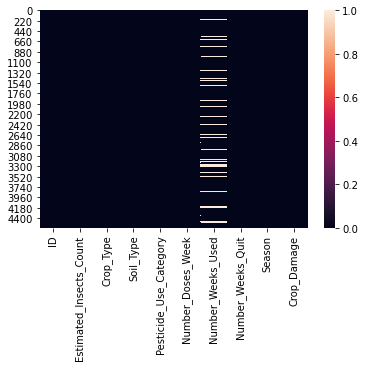

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(agri.isnull())
plt.show()

In [9]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
agri['Number_Weeks_Used']=imp.fit_transform(agri['Number_Weeks_Used'].values.reshape(-1,1))

In [10]:
agri1=agri.corr()
agri1

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


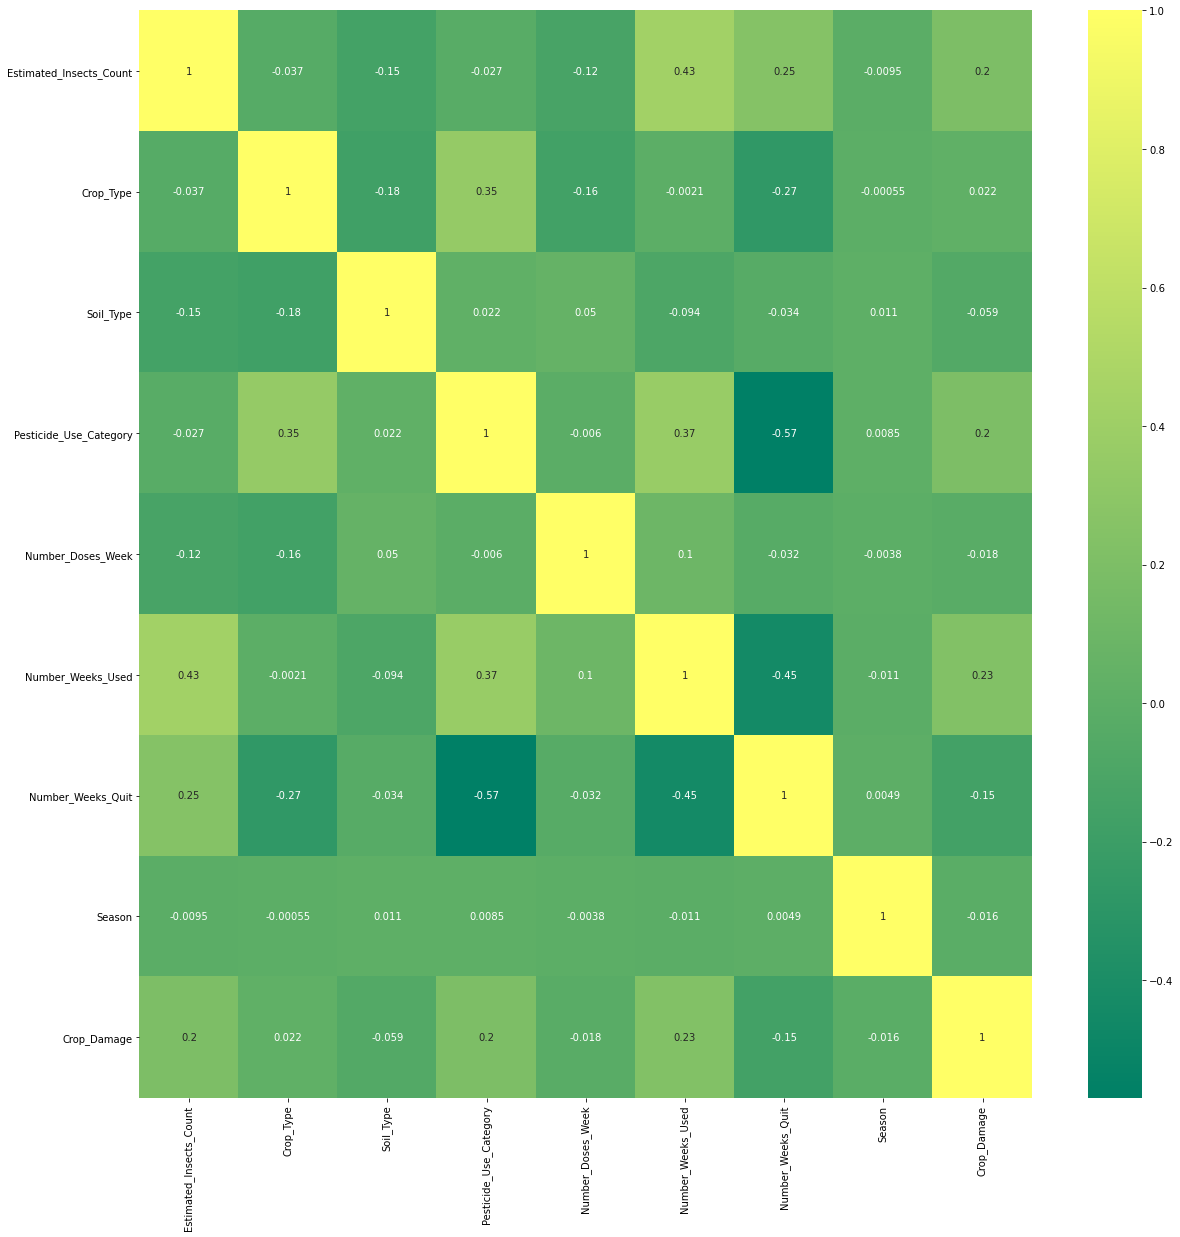

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(agri1,annot=True,cmap='summer')

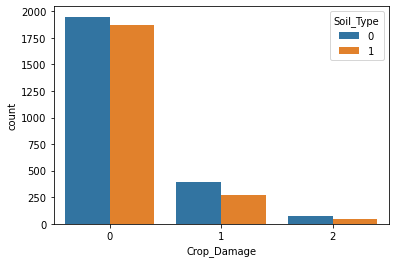

In [12]:
sns.countplot(x='Crop_Damage',hue='Soil_Type',data=agri)
plt.show()

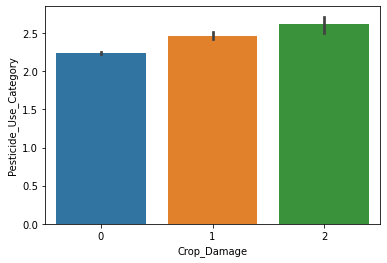

In [13]:
sns.barplot(x='Crop_Damage',y='Pesticide_Use_Category',data=agri)
plt.show()

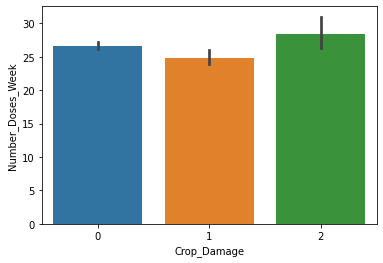

In [14]:
sns.barplot(x='Crop_Damage',y='Number_Doses_Week',data=agri)
plt.show()

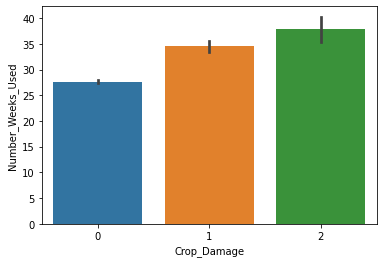

In [15]:
sns.barplot(x='Crop_Damage',y='Number_Weeks_Used',data=agri)
plt.show()

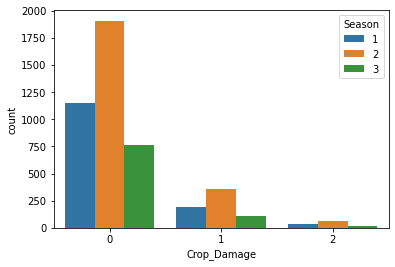

In [16]:
sns.countplot(x='Crop_Damage',hue='Season',data=agri)
plt.show()

In [17]:
agri.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [18]:
agri1=pd.DataFrame(agri['Crop_Damage'])

In [19]:
agri=agri.drop(['Crop_Damage','ID'],axis=1)

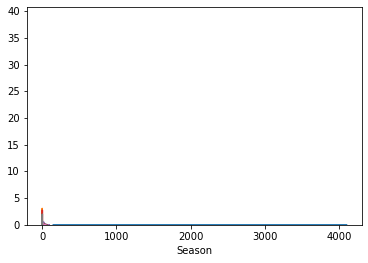

In [20]:
collist=agri.columns.values
ncol=10
nrow=10
for i in agri.columns:
    sns.distplot(agri[i],kde_kws={'bw':0.1})

# Finding the skewness

In [21]:
for col in agri.columns:
    if agri[col].skew()>0.55:
        agri[col]=np.log1p(agri[col])

In [22]:
agri.skew()

Estimated_Insects_Count   -0.498606
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.416624
Number_Doses_Week         -1.196764
Number_Weeks_Used          0.278664
Number_Weeks_Quit         -0.199671
Season                     0.144841
dtype: float64

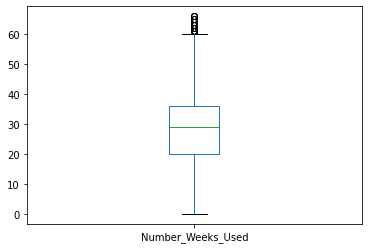

In [23]:
agri['Number_Weeks_Used'].plot.box()

In [24]:
agri=pd.concat([agri,agri1],axis=1)
agri.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,5.241747,0.693147,0,0.693147,0.0,0.0,0.0,1,0
1,5.347108,0.693147,0,0.693147,0.0,0.0,0.0,2,1
2,5.552960,0.693147,0,0.693147,0.0,0.0,0.0,2,1
3,5.552960,0.693147,1,0.693147,0.0,0.0,0.0,2,1
4,5.837730,0.693147,0,0.693147,0.0,0.0,0.0,2,1


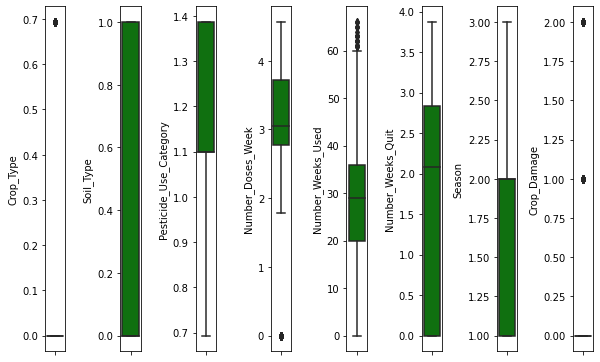

In [25]:
col=agri.columns.values
ncol=10
nrow=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(agri[col[i]],color='green',orient='v')
    plt.tight_layout()

In [26]:
from scipy.stats import zscore
z_score=abs(zscore(agri))
print(agri.shape)
train_agri=agri.loc[(z_score<3).all(axis=1)]
print(train_agri.shape)

(4599, 9)
(4414, 9)


In [27]:
df_x=train_agri.drop(['Crop_Damage'],axis=1)

In [28]:
y=pd.DataFrame(train_agri['Crop_Damage'])

In [29]:
df_x.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
27,5.129899,0.0,1,1.386294,3.044522,14.0,0.0,2
28,5.129899,0.0,1,1.386294,3.044522,15.0,0.0,2
29,5.241747,0.0,0,1.386294,3.258097,19.0,0.0,1
30,5.241747,0.0,1,1.386294,3.713572,24.0,0.0,3
31,5.347108,0.0,1,1.386294,3.044522,8.0,0.0,3


In [30]:
y.head()

,Crop_Damage
27,0
28,1
29,0
30,0
31,0


In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [32]:
x.shape

(4414, 8)

In [33]:
y.shape

(4414, 1)

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn import svm
svc=svm.SVC()
parameters={'kernel':['linear','rbf','poly'],'C':[1.0]}
gd=GridSearchCV(svc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'C': 1.0, 'kernel': 'linear'}


In [36]:
dtc=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy']}
gd=GridSearchCV(dtc,parameters)
gd.fit(x,y)
sorted(gd.cv_results_.keys())
print(gd.best_params_)

{'criterion': 'entropy'}


In [37]:
model=[DecisionTreeClassifier(criterion='gini'),KNeighborsClassifier(),SVC(kernel='linear'),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=61,test_size=.20)
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('score:')
    print('accuracy_score:',accuracy_score(y_test,predm))
    print('confusion_matrix:',confusion_matrix(y_test,predm))
    print('classification_report:',classification_report(y_test,predm))
    print('************************************************************************************************************************************')
    print('\n')

score of DecisionTreeClassifier() is: 0.9988671764372699
score:
accuracy_score: 0.7802944507361268
confusion_matrix: [[656 117]
 [ 77  33]]
classification_report:               precision    recall  f1-score   support

           0       0.89      0.85      0.87       773
           1       0.22      0.30      0.25       110

    accuracy                           0.78       883
   macro avg       0.56      0.57      0.56       883
weighted avg       0.81      0.78      0.79       883

************************************************************************************************************************************


score of KNeighborsClassifier() is: 0.8751062022090059
score:
accuracy_score: 0.840317100792752
confusion_matrix: [[723  50]
 [ 91  19]]
classification_report:               precision    recall  f1-score   support

           0       0.89      0.94      0.91       773
           1       0.28      0.17      0.21       110

    accuracy                           0.84       8

In [38]:
from sklearn.model_selection import cross_val_score
model=[DecisionTreeClassifier(criterion='gini'),KNeighborsClassifier(),SVC(kernel='linear'),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Score of',m,'is:',score)
    print('Mean score:',score.mean())
    print('Standard deviation:',score.std())
    print('*******************************************************************************************************')
    print('\n')

Score of DecisionTreeClassifier() is: [0.70894677 0.75537939 0.7587769  0.72706682 0.78117914]
Mean score: 0.7462698027493369
Standard deviation: 0.025376512368256287
*******************************************************************************************************


Score of KNeighborsClassifier() is: [0.78029445 0.8380521  0.81993205 0.82219706 0.8446712 ]
Mean score: 0.8210293706006373
Standard deviation: 0.02240808171523427
*******************************************************************************************************


Score of SVC(kernel='linear') is: [0.85843715 0.85843715 0.85730464 0.85730464 0.85827664]
Mean score: 0.8579520445399753
Standard deviation: 0.0005318399509730787
*******************************************************************************************************


Score of GaussianNB() is: [0.61608154 0.86862967 0.82332956 0.80520951 0.86281179]
Mean score: 0.7952124149017856
Standard deviation: 0.09266947207479542
*********************************

In [39]:
gbc=GradientBoostingClassifier(random_state=55)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8674971687429218
[[748  25]
 [ 92  18]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       773
           1       0.42      0.16      0.24       110

    accuracy                           0.87       883
   macro avg       0.65      0.57      0.58       883
weighted avg       0.83      0.87      0.84       883



Text(0.5, 1.0, 'Confusion_matrix of DecisionTreeClassifier')

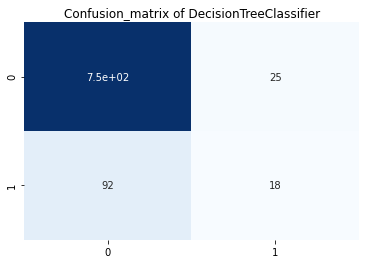

In [40]:
#confusion matrix for GradientBoostingClassifier
cm=confusion_matrix(y_test,predgbc)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')
plt.title("Confusion_matrix of DecisionTreeClassifier")

In [41]:
import joblib
joblib.dump(dtc,'agri.pkl')

['agri.pkl']

In [42]:
import pandas as pd 
import numpy as np
test_agri=pd.read_excel('test_agriculture.xlsx')

In [43]:
test_agri.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [44]:
test_agri.shape

(1199, 9)

In [45]:
test_agri=test_agri.drop(['ID'],axis=1)

In [46]:
test_agri.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

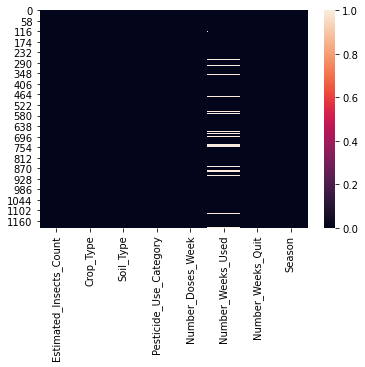

In [47]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(test_agri.isnull())
plt.show()

In [48]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='mean')
test_agri['Number_Weeks_Used']=imp.fit_transform(test_agri['Number_Weeks_Used'].values.reshape(-1,1))

In [49]:
test_agri.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.130647,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,29.033333,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,36.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


In [50]:
test_agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  1199 non-null   int64  
 1   Crop_Type                1199 non-null   int64  
 2   Soil_Type                1199 non-null   int64  
 3   Pesticide_Use_Category   1199 non-null   int64  
 4   Number_Doses_Week        1199 non-null   int64  
 5   Number_Weeks_Used        1199 non-null   float64
 6   Number_Weeks_Quit        1199 non-null   int64  
 7   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 75.1 KB


In [51]:
test=test_agri.corr()

In [52]:
test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,0.020773,-0.339516,0.038259,-0.121168,0.491944,0.146441,0.023384
Crop_Type,0.020773,1.000000,0.063050,0.482378,-0.170014,0.062412,-0.390935,0.020282
Soil_Type,-0.339516,0.063050,1.000000,0.129857,0.057118,-0.139741,-0.191989,-0.069242
Pesticide_Use_Category,0.038259,0.482378,0.129857,1.000000,-0.010922,0.406020,-0.584312,0.015085
Number_Doses_Week,-0.121168,-0.170014,0.057118,-0.010922,1.000000,0.122996,0.009077,0.027197
Number_Weeks_Used,0.491944,0.062412,-0.139741,0.406020,0.122996,1.000000,-0.362582,0.018306
Number_Weeks_Quit,0.146441,-0.390935,-0.191989,-0.584312,0.009077,-0.362582,1.000000,0.030281
Season,0.023384,0.020282,-0.069242,0.015085,0.027197,0.018306,0.030281,1.000000


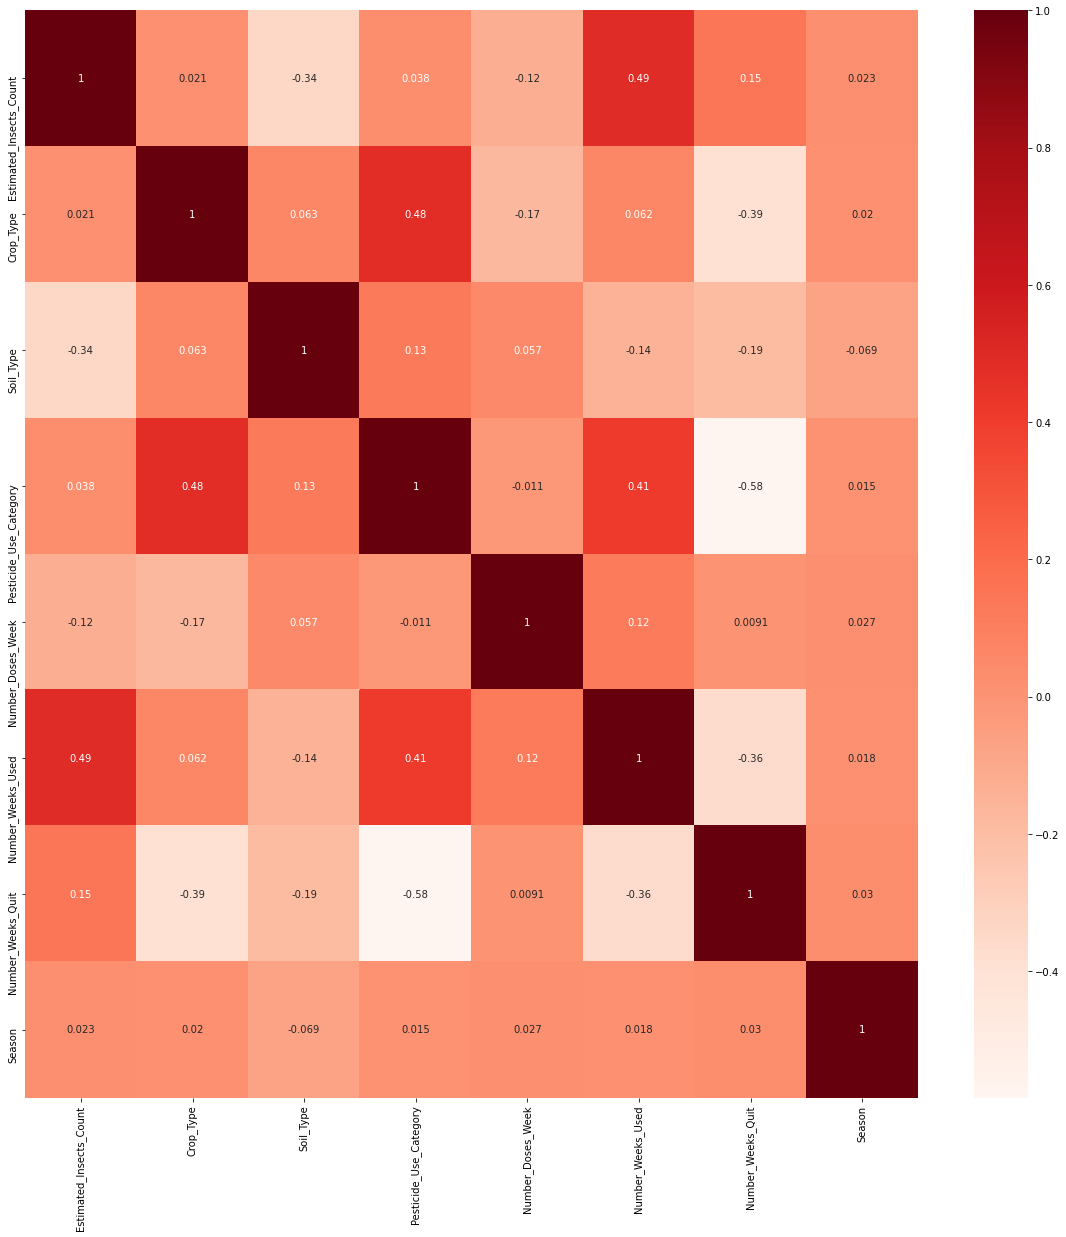

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(test,annot=True,cmap='Reds')


In [54]:
test_agri.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

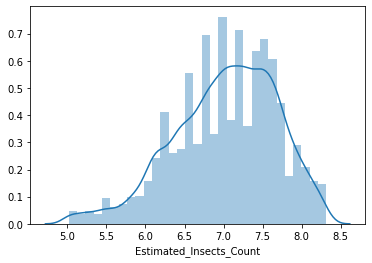

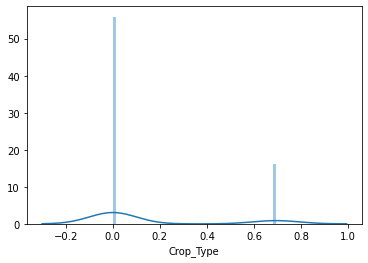

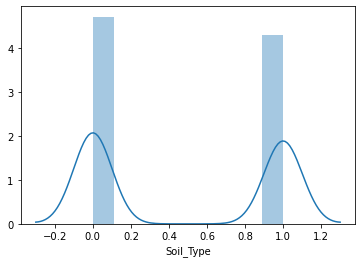

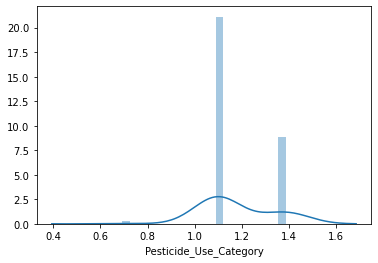

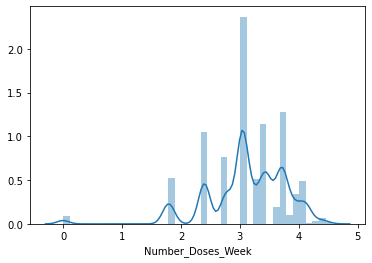

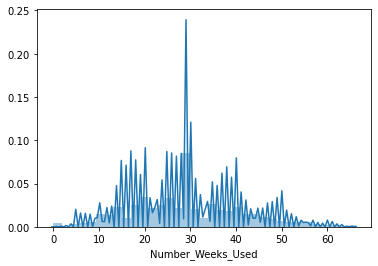

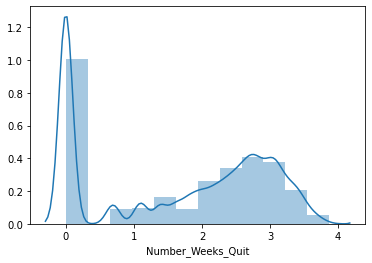

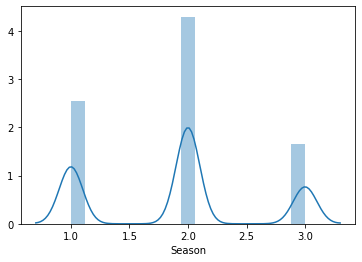

In [55]:
collist=test_agri.columns.values
ncol=10
nrow=10
for i in test_agri.columns:
    sns.distplot(agri[i],kde_kws={'bw':0.1})
    plt.show()

In [56]:
for col in test_agri.columns:
    if test_agri[col].skew()>0.55:
        test_agri[col]=np.log1p(test_agri[col])

In [57]:
test_agri.skew()

Estimated_Insects_Count   -0.274855
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week         -1.427895
Number_Weeks_Used          0.220343
Number_Weeks_Quit          0.197853
Season                     0.155872
dtype: float64

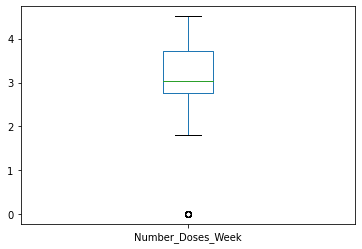

In [58]:
test_agri['Number_Doses_Week'].plot.box()

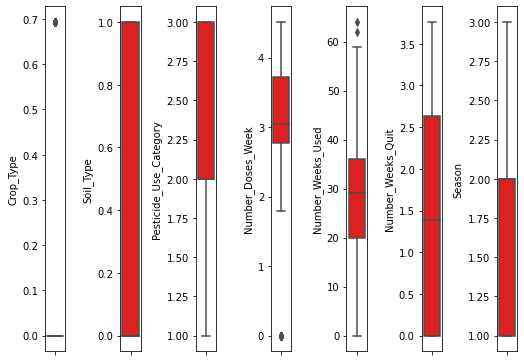

In [59]:
col=test_agri.columns.values
ncol=10
nrow=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(col)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(test_agri[col[i]],color='red',orient='v')
    plt.tight_layout()

In [60]:
from scipy.stats import zscore
z_score=abs(zscore(test_agri))
print(test_agri.shape)
test=test_agri.loc[(z_score<3).all(axis=1)]
print(test.shape)

(1199, 8)
(1177, 8)


In [61]:
#best model is GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=55)
gbc=gbc.fit(x_train,y_train)
#predicting
pred=gbc.predict(test)
new_pred=gbc.predict(test)

In [62]:
x.shape

(4414, 8)

In [63]:
new_pred.shape

(1177,)

In [65]:
aggriresult=pd.DataFrame(new_pred)

In [66]:
aggriresult

,0
0,0
1,0
2,0
3,0
4,0
...,...
1172,1
1173,0
1174,1
1175,1
